FFR 120  
Felix Waldschock

HW 3 
Exercise 12.2
## The Watts-Strogatz small-world model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange


In [3]:
# parameters
n = 10             # number of nodes
p = 0.0           # probability of connection
c = 0             # number of connections to nearest neighbours (even)

# check if c is even
if c%2 != 0:
    raise ValueError("c must be even")


In [4]:
# generate adjacency matrix
def generateAdjacencyMatrix(n,p,c):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            if np.random.rand() < p:
                A[i,j] = 1
                A[j,i] = 1
        # do the nearest neighbour connections
        for b in range(c):
            # c describes how many connections in total, so we need to divide by 2 to get the number of connections per side
            A[i,(i+int(b/2)+1)%n] = 1
            A[(i+int(b/2)+1)%n,i] = 1
            
            #A[i, (i + int(b) + 1) % n] = 1
            

    return A

In [5]:
n_a = 20
p_a = 0
c_a = 4
c_aa = 8

n_b = 20
p_b = 0.05
c_b = 4
c_bb = 8

A_a = generateAdjacencyMatrix(n_a,p_a,c_a)
A_aa = generateAdjacencyMatrix(n_a,p_a,c_aa)
A_b = generateAdjacencyMatrix(n_b,p_b,c_b)
A_bb = generateAdjacencyMatrix(n_b,p_b,c_bb)

In [6]:
def plot_ErdosRenyi(A, ax, title):
    # Get the number of nodes
    n = A.shape[0]

    # Calculate the angular spacing for nodes on the circle
    dAngle = 2 * np.pi / n

    # Set the radius of the circle
    r = 1

    # Calculate the coordinates of nodes on the circle
    x = r * np.cos(np.linspace(0, 2 * np.pi, n+1))
    y = r * np.sin(np.linspace(0, 2 * np.pi, n+1))

    # Plot nodes as blue circles
    ax.plot(x, y, 'o', color='blue')

    # Plot edges according to the Adjacency matrix A
    for i in range(n):
        for j in range(n):
            if A[i, j] == 1:
                ax.plot([x[i], x[j]], [y[i], y[j]], color='red')
    ax.set_title(title)
    # scale axes equally
    ax.axis('equal')

    # Turn off axis for cleaner visualization
    ax.axis('off')

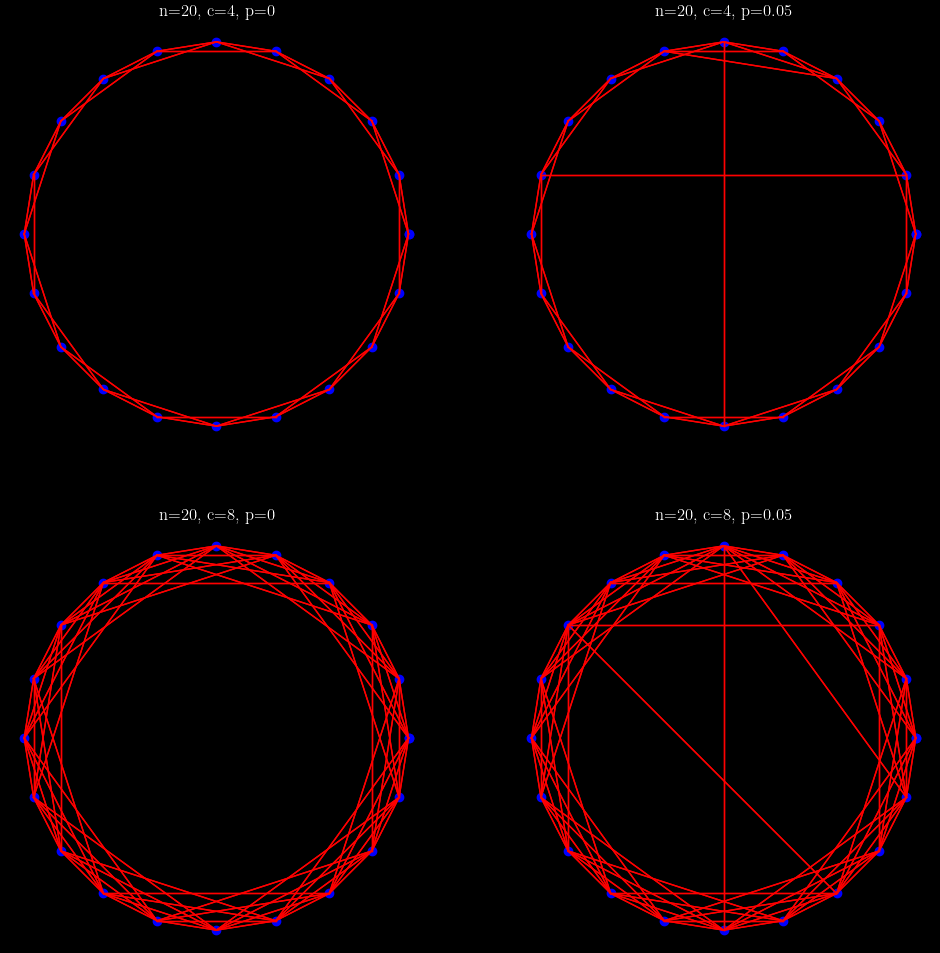

In [8]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot the two matrices and hand over their parameters, n c p
plot_ErdosRenyi(A_a, axes[0,0], f"n={n_a}, c={c_a}, p={p_a}")
plot_ErdosRenyi(A_aa, axes[1,0], f"n={n_a}, c={c_aa}, p={p_a}")
plot_ErdosRenyi(A_b, axes[0,1], f"n={n_b}, c={c_b}, p={p_b}")
plot_ErdosRenyi(A_bb, axes[1,1], f"n={n_b}, c={c_bb}, p={p_b}")


# Show the plot
plt.show()